In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('Iris_data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#pd.sample
shuffle_data = data.sample(frac = 1,random_state = 12345)
shuffle_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
69,5.6,2.5,3.9,1.1,Iris-versicolor
42,4.4,3.2,1.3,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa


In [4]:
X_train = shuffle_data.iloc[:100,:-1].values
Y_train = shuffle_data.iloc[:100,-1].values

X_test = shuffle_data.iloc[100:,:-1].values
Y_test = shuffle_data.iloc[100:,-1].values

In [5]:
#predictions
classificator = KNeighborsClassifier(n_neighbors=10)
classificator = classificator.fit(X_train, Y_train)

Y_pred_train = classificator.predict(X_train)
Y_pred_test = classificator.predict(X_test)

In [6]:
#metrics
acc_train = sum(Y_pred_train == Y_train) / len(Y_train)
acc_test = sum(Y_pred_test == Y_test) / len(Y_test)

print(acc_train, acc_test)

0.97 0.9


In [7]:
def knn(X_train, Y_train, X_test, Y_test,n):
    classificator = KNeighborsClassifier(n_neighbors=n)
    classificator = classificator.fit(X_train, Y_train)

    Y_pred_train = classificator.predict(X_train)
    Y_pred_test = classificator.predict(X_test) 
    
    #metrics
    acc_train = (sum(Y_pred_train == Y_train) / len(Y_train)) * 100 
    acc_test = (sum(Y_pred_test == Y_test) / len(Y_test)) * 100
    
    return acc_train, acc_test

<Figure size 720x576 with 0 Axes>

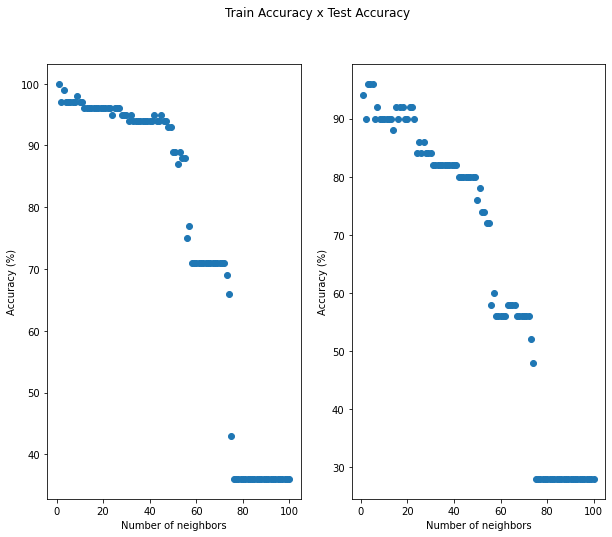

In [8]:
import matplotlib.pyplot as plt

test_acc_arr = []
train_acc_arr = []

for key in range(1,len(X_train)+1):
    
    acc_train, acc_test = knn(X_train, Y_train, X_test, Y_test, key)
    test_acc_arr.append(acc_test)
    train_acc_arr.append(acc_train)

X = range(1,len(X_train)+1) 
fig = plt.figure(figsize = (10,8))
fig, axs = plt.subplots(1, 2, figsize = (10,8))

axs[0].plot(X,train_acc_arr,'o') 

axs[1].plot(X,test_acc_arr,'o') 


for ax in axs.flat:
    ax.set(xlabel='Number of neighbors', ylabel='Accuracy (%)')

fig.suptitle('Train Accuracy x Test Accuracy')

plt.show()    